In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

#This function feteches the data from the "coin_marketcap_api.com" website 
def api_runner():
    global df
    url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
                  'start':'1',
                  'limit':'15',
                  'convert':'USD'
                 }
    headers = {
               'Accepts': 'application/json',
               'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
              }

    session = Session()
    session.headers.update(headers)

    try:
       response = session.get(url, params=parameters)
       data = json.loads(response.text)
       print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
       print(e)
    
#We are creating a dataframe from the api data    
    df = pd.json_normalize(data['data'])
    df["timestamp"]=pd.to_datetime("now")
    df
    
#We are storing the dataframe/data in a csv file
    if not os.path.isfile(r"C:\Users\LENOVO\Desktop\Projects\API_project.csv"):
        df.to_csv(r"C:\Users\LENOVO\Desktop\Projects\API_project.csv",header="coloumn-names")
    else:
#We are appending the new data to the csv file
        df.to_csv(r"C:\Users\LENOVO\Desktop\Projects\API_project.csv",mode="a",header=False)

In [3]:
import os
from time import time
from time import sleep

for i in range(300):
    api_response=api_runner()
    print("API runner completed")
#This willupdate the data after every 60 seconds    
    sleep(60)
exit()

{'status': {'timestamp': '2024-05-16T14:37:52.188Z', 'error_code': 0, 'error_message': None, 'elapsed': 1, 'credit_count': 1, 'notice': None}, 'data': [{'id': 9217, 'name': 'ls2921yct9j', 'symbol': 'm55nm0yoil', 'slug': 'c7zy0sf9grj', 'cmc_rank': 7563, 'num_market_pairs': 6166, 'circulating_supply': 3488, 'total_supply': 8527, 'max_supply': 8959, 'infinite_supply': None, 'last_updated': '2024-05-16T14:37:52.188Z', 'date_added': '2024-05-16T14:37:52.188Z', 'tags': ['wnhh7ideoy', 'tl9w475uq7', 'yqr8tryyseq', 'o9hv4e5n00b', 'eqtfcmrxo7l', 'z8s69iz2in', '51ftr5f2gf', 'qih82fspfxl', 'knwt08yg96o', 'v0ugwyxlr7'], 'platform': None, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'quote': {'USD': {'price': 0.8650226085967734, 'volume_24h': 4594, 'volume_change_24h': 0.7488678802612692, 'percent_change_1h': 0.5398671925523748, 'percent_change_24h': 0.21444690385503606, 'percent_change_7d': 0.805797749478856, 'market_cap': 0.4171019282265549, 'market_cap_dominance': 2

API runner completed


KeyboardInterrupt: 

In [4]:
 df=pd.read_csv(r"C:\Users\LENOVO\Desktop\Projects\API_project.csv")

In [6]:
df

,Unnamed: 0,id,name,symbol,slug,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,...,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,timestamp
0,0,7050,4q5st6hubx2,txmu9crh3no,kfzfoqvwp9l,2745,3377,8687,7571,3668,...,3544,0.074888,0.434258,0.286408,0.066718,0.879900,3537,0.150601,2024-05-11T13:24:43.188Z,2024-05-11 18:54:43.406411
1,1,6694,qnyajln87ye,uyl9scqsth8,bv1j28oyfa,2902,9265,5375,3735,9120,...,1061,0.256893,0.131269,0.127944,0.714240,0.581557,3799,0.324386,2024-05-11T13:24:43.188Z,2024-05-11 18:54:43.406411
2,2,2401,3lk6xudi1mg,625n3jf9ts7,rbf6vtk7yn,1471,3939,5679,921,2577,...,1543,0.437650,0.564891,0.044446,0.692328,0.638993,4560,0.176305,2024-05-11T13:24:43.188Z,2024-05-11 18:54:43.406411
3,3,8682,5orzrmp60f3,jp559pom9el,mu9njcj3wig,8142,6394,9742,3940,4616,...,5536,0.826845,0.582875,0.712089,0.726456,0.975224,5413,0.039868,2024-05-11T13:24:43.188Z,2024-05-11 18:54:43.406411
4,4,446,7y43q9zc7ve,hhp03rgpg68,jgs8puhpjic,1777,9857,4277,3339,1130,...,446,0.880123,0.615912,0.785298,0.693459,0.475780,4700,0.775208,2024-05-11T13:24:43.188Z,2024-05-11 18:54:43.406411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5,9970,oycbo8ndcp,o7jzcqbkmzj,h1nj9ukbhf,8641,9279,5742,8042,6026,...,1634,0.351322,0.906088,0.429982,0.384226,0.669146,8234,0.946998,2024-05-16T14:37:52.188Z,2024-05-16 20:07:51.968950
116,6,1731,9xmj39diaph,yz2jqf2pnuc,a3pv1w93s0n,7691,9735,2150,8009,5377,...,6904,0.463500,0.583893,0.991365,0.838110,0.858276,2797,0.962881,2024-05-16T14:37:52.188Z,2024-05-16 20:07:51.968950
117,7,9756,1jyxrfwitmg,gcjzm2i29fv,gmzws1bongi,5960,3335,2430,1641,4503,...,2519,0.530394,0.338313,0.413612,0.806712,0.139642,191,0.770202,2024-05-16T14:37:52.188Z,2024-05-16 20:07:51.968950
118,8,830,0c3hcg6b1ncn,ccdr0kzeala,3gvslsq7ln2,9533,6363,1374,3192,2836,...,7632,0.993723,0.911066,0.980486,0.114813,0.944847,6331,0.575879,2024-05-16T14:37:52.188Z,2024-05-16 20:07:51.968950


In [8]:
#We are grouping the name coloumn and percent_change coloumns
df3=df.groupby("name",sort=False)[["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d"]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d
name,,,
4q5st6hubx2,0.434258,0.286408,0.066718
qnyajln87ye,0.131269,0.127944,0.714240
3lk6xudi1mg,0.564891,0.044446,0.692328
5orzrmp60f3,0.582875,0.712089,0.726456
7y43q9zc7ve,0.615912,0.785298,0.693459
...,...,...,...
oycbo8ndcp,0.906088,0.429982,0.384226
9xmj39diaph,0.583893,0.991365,0.838110
1jyxrfwitmg,0.338313,0.413612,0.806712


In [9]:
#This method converts the dataframe to a series
df4=df3.stack()

In [10]:
df4

name                                      
4q5st6hubx2   quote.USD.percent_change_1h     0.434258
              quote.USD.percent_change_24h    0.286408
              quote.USD.percent_change_7d     0.066718
qnyajln87ye   quote.USD.percent_change_1h     0.131269
              quote.USD.percent_change_24h    0.127944
                                                ...   
0c3hcg6b1ncn  quote.USD.percent_change_24h    0.980486
              quote.USD.percent_change_7d     0.114813
cx33z4gpx4c   quote.USD.percent_change_1h     0.612411
              quote.USD.percent_change_24h    0.238585
              quote.USD.percent_change_7d     0.899345
Length: 360, dtype: float64

In [11]:
df5=df4.to_frame(name="value")
df5

value
name                                               
4q5st6hubx2  quote.USD.percent_change_1h   0.434258
             quote.USD.percent_change_24h  0.286408
             quote.USD.percent_change_7d   0.066718
qnyajln87ye  quote.USD.percent_change_1h   0.131269
             quote.USD.percent_change_24h  0.127944
...                                             ...
0c3hcg6b1ncn quote.USD.percent_change_24h  0.980486
             quote.USD.percent_change_7d   0.114813
cx33z4gpx4c  quote.USD.percent_change_1h   0.612411
             quote.USD.percent_change_24h  0.238585
             quote.USD.percent_change_7d   0.899345

[360 rows x 1 columns]

In [12]:
#We are creating index for each row
df6=df5.reset_index()
df6

,name,level_1,value
0,4q5st6hubx2,quote.USD.percent_change_1h,0.434258
1,4q5st6hubx2,quote.USD.percent_change_24h,0.286408
2,4q5st6hubx2,quote.USD.percent_change_7d,0.066718
3,qnyajln87ye,quote.USD.percent_change_1h,0.131269
4,qnyajln87ye,quote.USD.percent_change_24h,0.127944
...,...,...,...
355,0c3hcg6b1ncn,quote.USD.percent_change_24h,0.980486
356,0c3hcg6b1ncn,quote.USD.percent_change_7d,0.114813
357,cx33z4gpx4c,quote.USD.percent_change_1h,0.612411
358,cx33z4gpx4c,quote.USD.percent_change_24h,0.238585


In [13]:
#We are changing the cloumn name from level_1 to percent_change
df7=df6.rename(columns={"level_1":"percent_change"})
df7

,name,percent_change,value
0,4q5st6hubx2,quote.USD.percent_change_1h,0.434258
1,4q5st6hubx2,quote.USD.percent_change_24h,0.286408
2,4q5st6hubx2,quote.USD.percent_change_7d,0.066718
3,qnyajln87ye,quote.USD.percent_change_1h,0.131269
4,qnyajln87ye,quote.USD.percent_change_24h,0.127944
...,...,...,...
355,0c3hcg6b1ncn,quote.USD.percent_change_24h,0.980486
356,0c3hcg6b1ncn,quote.USD.percent_change_7d,0.114813
357,cx33z4gpx4c,quote.USD.percent_change_1h,0.612411
358,cx33z4gpx4c,quote.USD.percent_change_24h,0.238585


In [29]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d'],['1h','24h','7d'])
df7

,name,percent_change,value
0,4q5st6hubx2,1h,0.434258
1,4q5st6hubx2,24h,0.286408
2,4q5st6hubx2,7d,0.066718
3,qnyajln87ye,1h,0.131269
4,qnyajln87ye,24h,0.127944
...,...,...,...
355,0c3hcg6b1ncn,24h,0.980486
356,0c3hcg6b1ncn,7d,0.114813
357,cx33z4gpx4c,1h,0.612411
358,cx33z4gpx4c,24h,0.238585


C:\Users\LENOVO\.conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


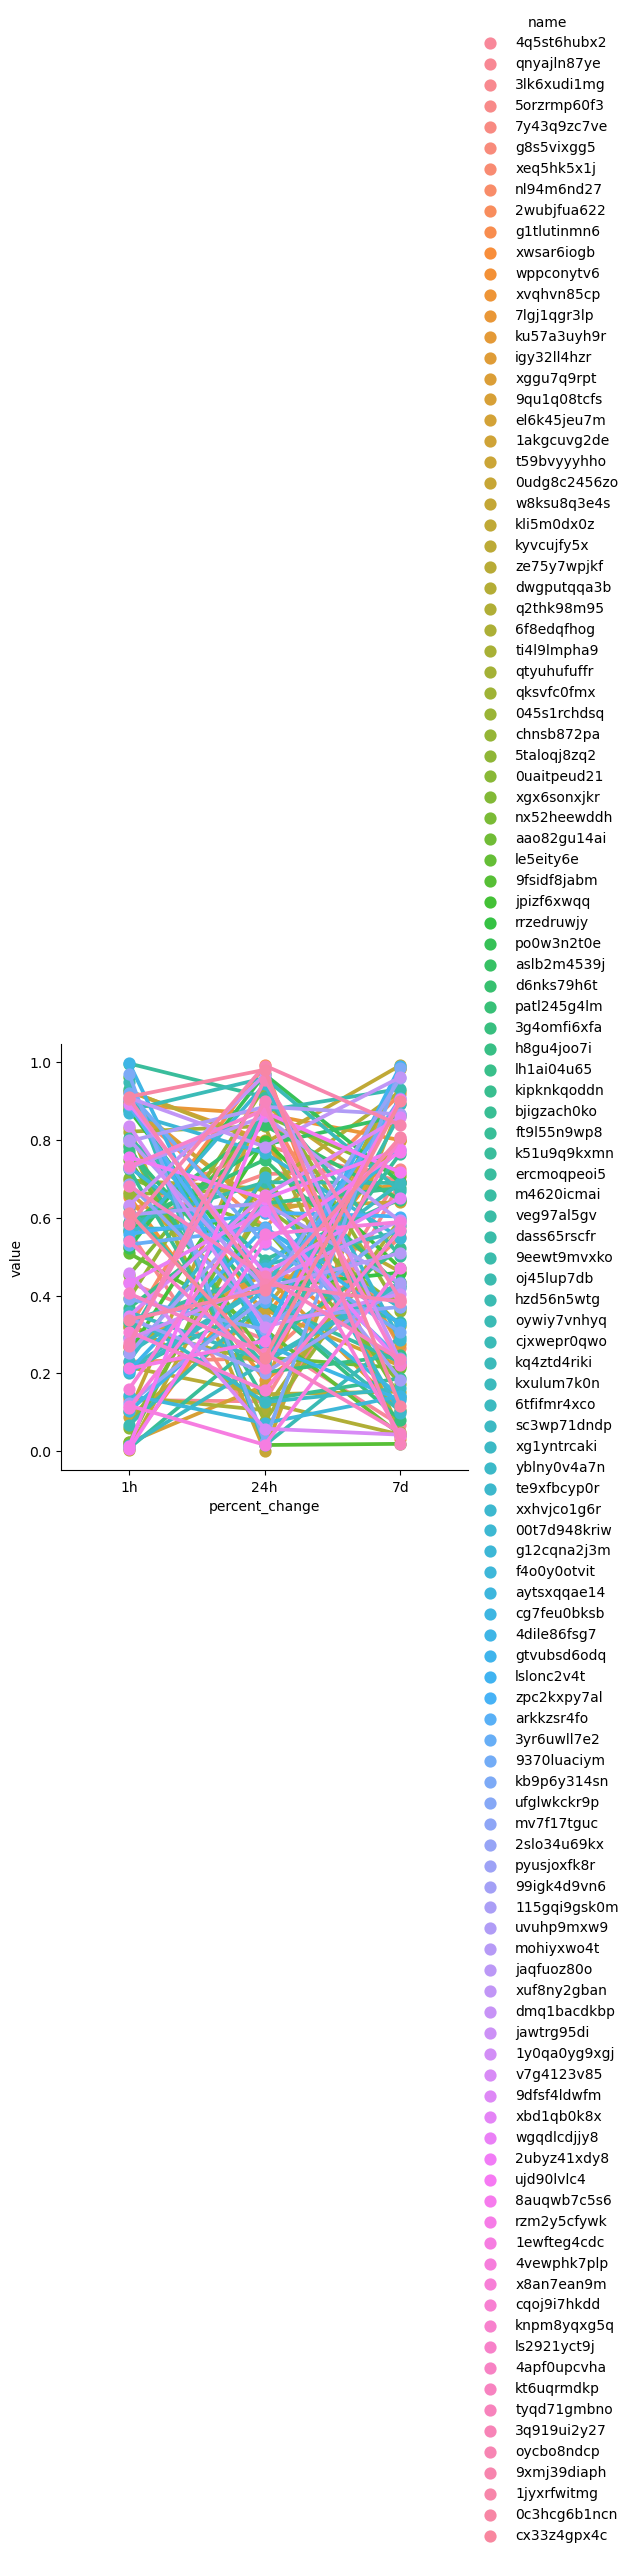

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="percent_change",y="value",hue="name",data=df7,kind="point")

In [34]:
df8=df[["name","quote.USD.price","timestamp"]]
df8

,name,quote.USD.price,timestamp
0,4q5st6hubx2,0.284697,2024-05-11 18:54:43.406411
1,qnyajln87ye,0.012089,2024-05-11 18:54:43.406411
2,3lk6xudi1mg,0.889485,2024-05-11 18:54:43.406411
3,5orzrmp60f3,0.815535,2024-05-11 18:54:43.406411
4,7y43q9zc7ve,0.179060,2024-05-11 18:54:43.406411
...,...,...,...
115,oycbo8ndcp,0.283037,2024-05-16 20:07:51.968950
116,9xmj39diaph,0.101682,2024-05-16 20:07:51.968950
117,1jyxrfwitmg,0.283146,2024-05-16 20:07:51.968950
118,0c3hcg6b1ncn,0.745805,2024-05-16 20:07:51.968950


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

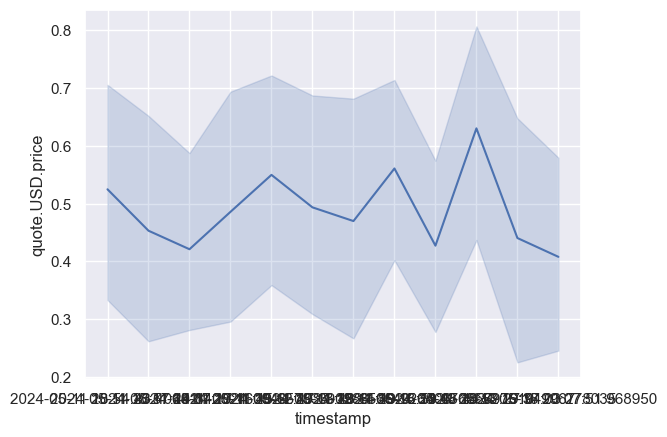

In [39]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="timestamp",y="quote.USD.price",data=df8)